In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_movies=pd.read_csv('Movies.csv')
df_cast=pd.read_csv('Cast.csv')
df_crew=pd.read_csv('Crew.csv')

In [ ]:
#Una vez limpiados los DataFrames, procederemos a realizar el procesp EDA
#Para este proceso, solo se va a trabajar con el DataFrame "df_movies"
#Esto es debido a que los demás solo contienen información 
#Mientras que el DataFrame a analizar contiene hechos, como budget, revenue, vote y demás

In [41]:
#Empezemos con valores nulos,  observamos que la columna collection_name tiene demasiados valores nulos
#pero es una columna que nos brinda más información aceca de la pelicula por eso no se borrará, al igual
#que country_id y country. Las demás que tienen nulos no representan un porcentaje alto que pueda afectar
#el análisis

df_movies.isnull().sum()

Unnamed: 0               0
budget                   2
id                       0
original_language        3
overview               486
popularity               1
release_date             2
revenue                  0
runtime                 96
status                  38
title                    2
vote_average             2
vote_count               2
id_belongs               0
collection_name      26404
company_name          2670
company_id               0
country_id            2796
country               2794
language_id              0
language                 0
genre_id                 0
genre_name             277
release_year             2
return                   2
dtype: int64

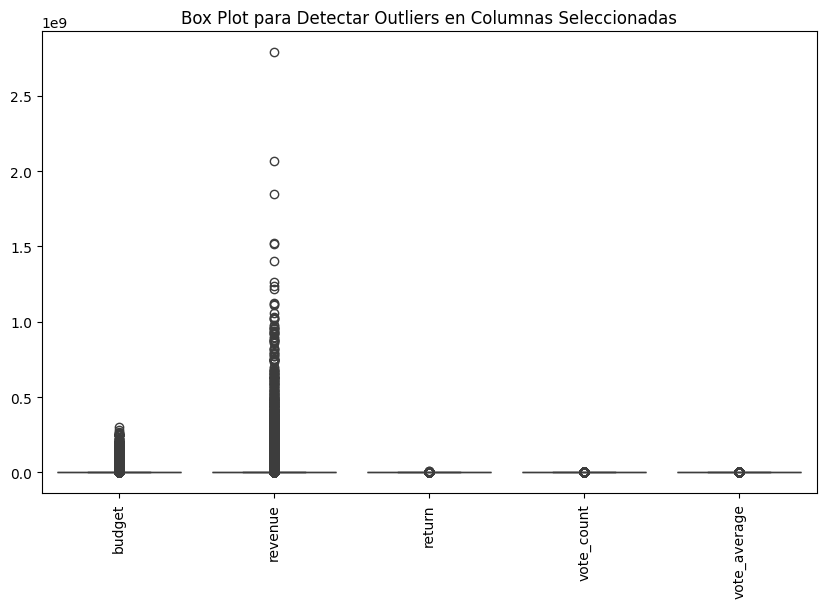

In [12]:
#Comenzamos con la detección de outliers y vemos que la columna budget contiene 3 oitliers

to_analize=['budget', 'revenue', 'return', 'vote_count', 'vote_average']
df_analize=df_movies[to_analize]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_analize)
plt.xticks(rotation=90)
plt.title('Box Plot para Detectar Outliers en Columnas Seleccionadas')
plt.show()

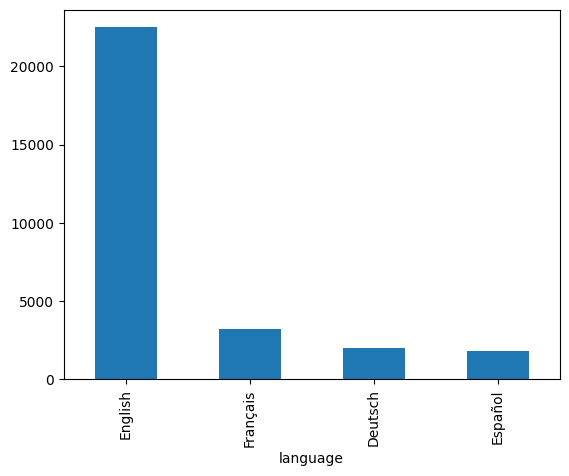

In [15]:
#En este siguiente gráfico, vemos que hay más peliculas en ingles dentro de nuestro DataFrame
#Esto nos puede indicar que se producen más peliculas en ese idioma

df_movies['language'].value_counts().plot(kind='bar')
plt.show()

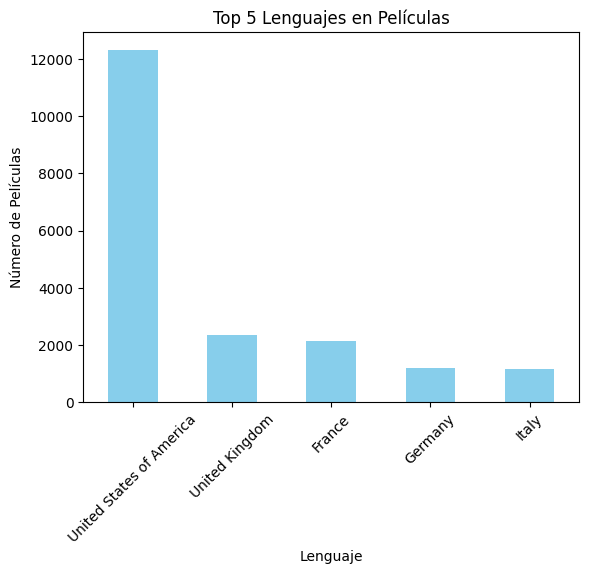

In [16]:
#A continuación, analizamos los países en los cuales de produjeron las peliculas
#Vemos que coincide con el gráficp anterior, Estados Unidos es el países que más peliculas tiene
#Coincide con el idioma y vemos presente a United Kingdom que igual produce peliculas en ingles

top_5=df_movies['country'].value_counts().head(5)

top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 Paises')
plt.xlabel('Pais')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()

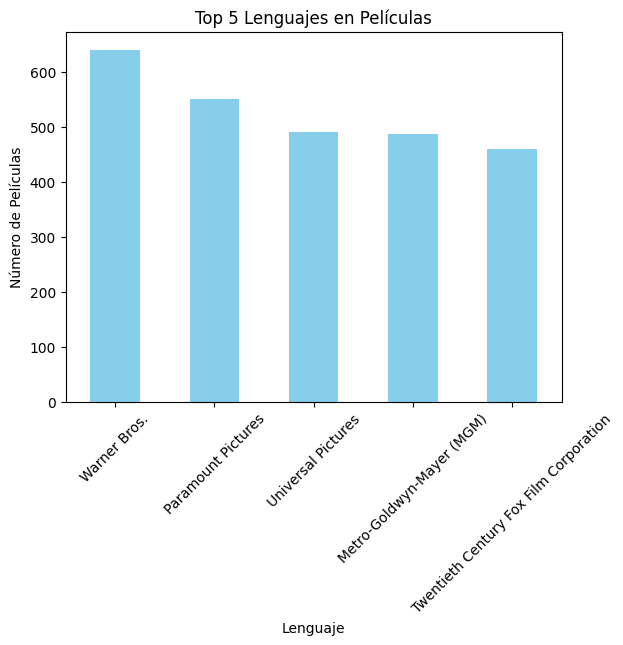

In [18]:
#Ahora, analizamos las compañias productoras, y aquí observamos un poco más de igualdas
#Aunque igual reafirma los resultados anteriores, ya que Warner Bros está mayormente presente
#Y esa compañia está en Estados Unidos

top_5_comp=df_movies['company_name'].value_counts().head(5)

top_5_comp.plot(kind='bar', color='skyblue')
plt.title('Top 5 Compañias en Películas')
plt.xlabel('Compañia')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()

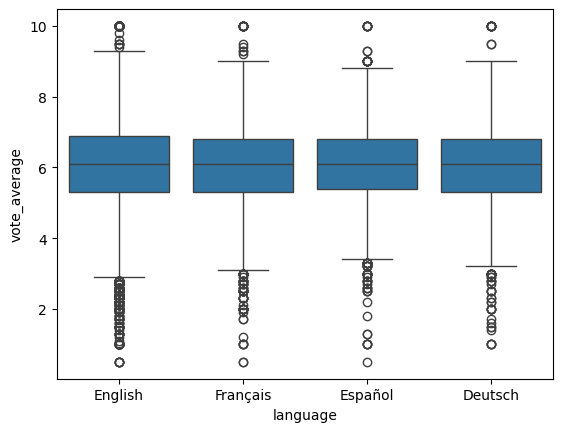

In [23]:
#En cuanto a los lenuajes, vemos que las peliculas en alemán están peores calificadas, pero
#presentan más outliers las peliculas en idioma ingles, esto puede ser debido a que presentan más
#peliculas dentro del catálogo.

sns.boxplot(x='language', y='vote_average', data=df_movies)
plt.show()

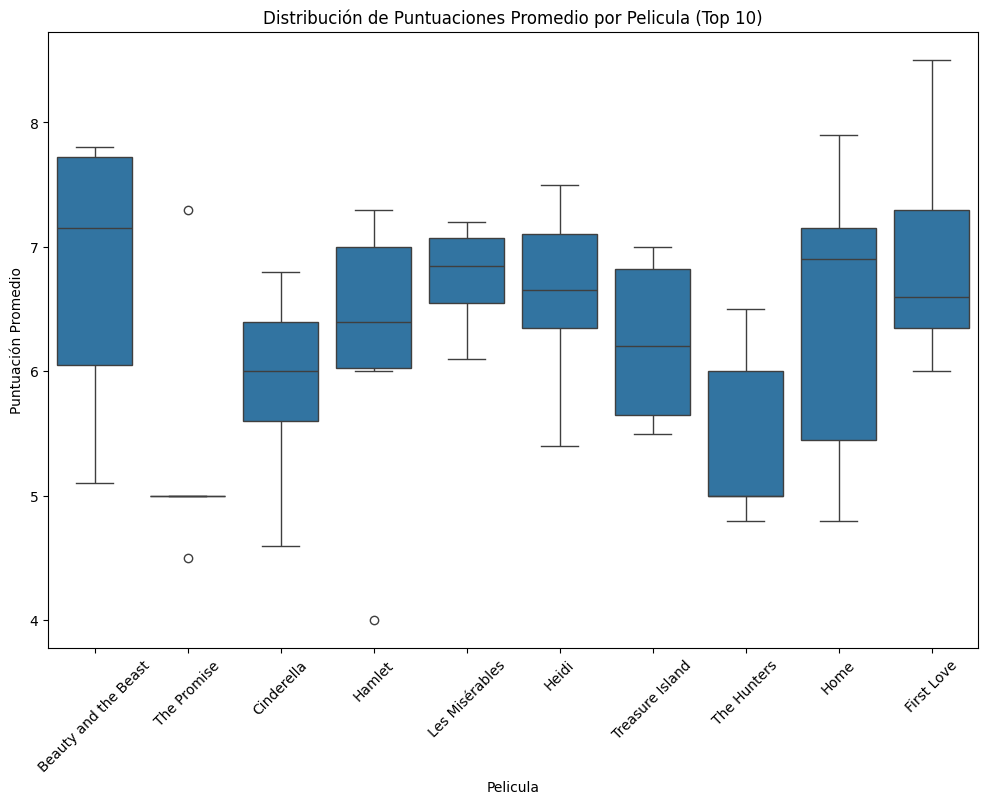

In [43]:
#Ahora analizamos las peliculas pero solo un top 10, se observa que Beauty and the Beast
#tiene muchas más calificaiones que las demás, mientras que The Promise es la que menos tiene

top_10_mov=df_movies['title'].value_counts().head(10).index
df_top_10_mov= df_movies[df_movies['title'].isin(top_10_mov)]
plt.figure(figsize=(12, 8))
sns.boxplot(x='title', y='vote_average', data=df_top_10_mov)
plt.title('Distribución de Puntuaciones Promedio por Pelicula (Top 10)')
plt.xlabel('Pelicula')
plt.ylabel('Puntuación Promedio')
plt.xticks(rotation=45)
plt.show()

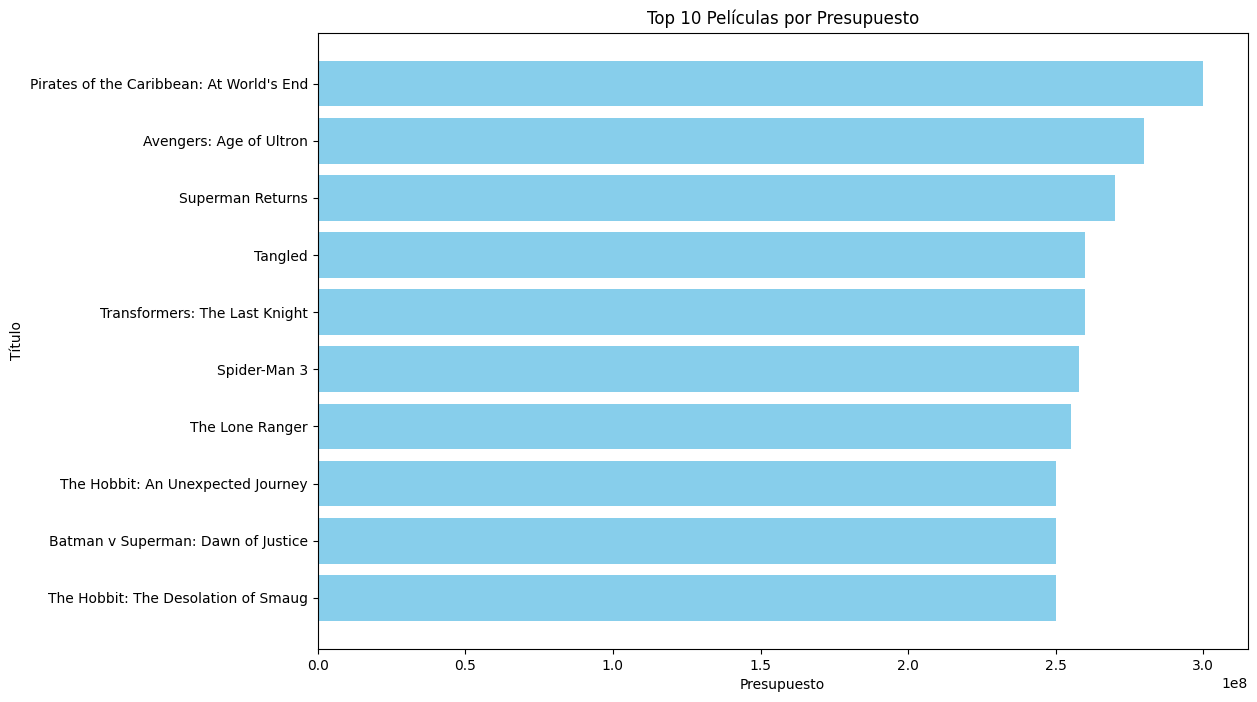

In [48]:
#Se observa un top 10 de peliculas que más presupuesto tuvieron y vemos que ninguna está en el top 10
#de mejores calificadas, pero, que todas son peliculas en ingles, que eso si coincide con las que más
#votos tienen

df_a=df_movies[['title', 'budget']]
df_top_10=df_a.sort_values(by='budget', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(df_top_10['title'], df_top_10['budget'], color='skyblue')
plt.xlabel('Presupuesto')
plt.ylabel('Título')
plt.title('Top 10 Películas por Presupuesto')
plt.gca().invert_yaxis()
plt.show()

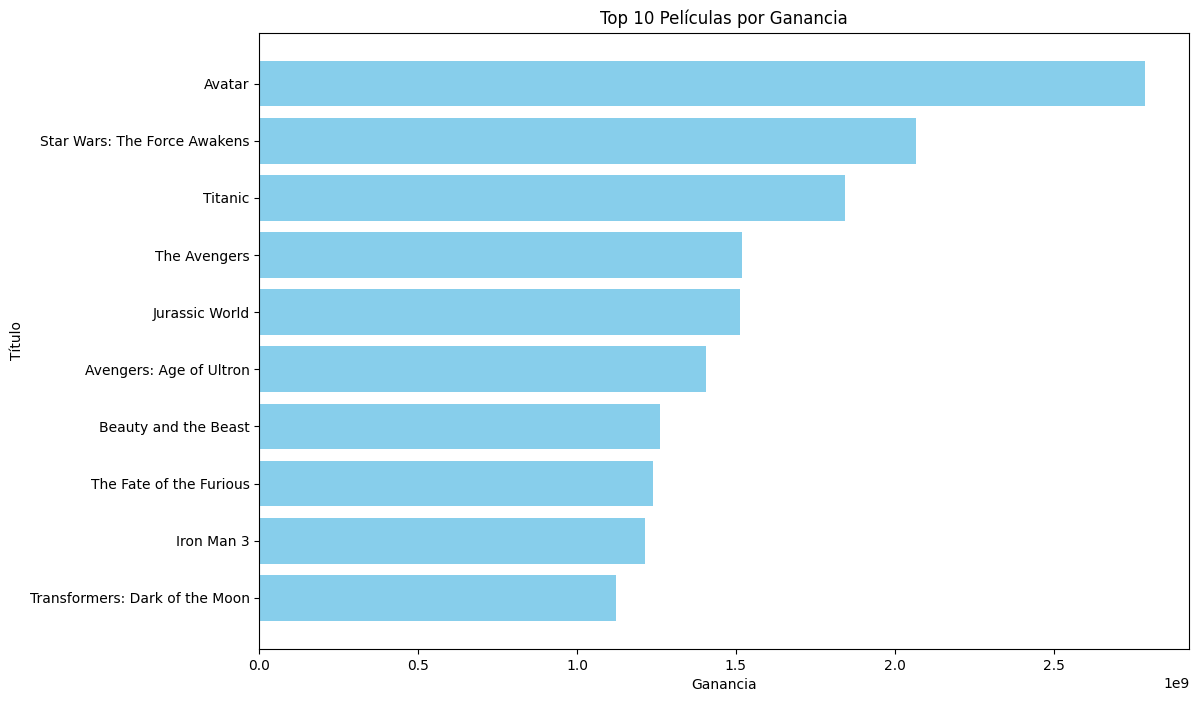

In [51]:
#Ahora pasamoa con revenue, y se observa que sola la pelicula de Avengers: Age of Ultron aparece,
#en cambio Avatar nos muestra que costó menos y ganó mucho más

df_b=df_movies[['title', 'revenue']]
df_top_10_b=df_b.sort_values(by='revenue', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(df_top_10_b['title'], df_top_10_b['revenue'], color='skyblue')
plt.xlabel('Ganancia')
plt.ylabel('Título')
plt.title('Top 10 Películas por Ganancia')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#Al final, el proceso EDA nos puede ofreecer una análisis más profundo de nuestros datos
#y tener una mejor perspectiva de los mismos